In [60]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 2 18:41:36 2023

@author: tosim
"""

'\nCreated on Wed Aug  2 18:41:36 2023\n\n@author: tosim\n'

In [61]:
import sys
!{sys.executable} -m pip install seaborn

Hey I'm editing this


In [62]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import os
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import sem
import statsmodels.api as sm
from scipy.stats import shapiro 
from matplotlib.legend_handler import HandlerTuple
import scipy.stats as stats
import os

In [63]:
#Set directory where to find the raw data

directory = os.chdir(r'C:\Users\tosim\OneDrive\Desktop\PyIntegration\psychoflicker-master\src\data')


In [64]:
#get the list of all files and directories in the specified directory
parent_list = os.listdir(directory)
parent_list.sort()
parent_list.remove('.DS_Store')
parent_list.remove('Scartare')

In [65]:
parent_list

['S1',
 'S10',
 'S11',
 'S12',
 'S13',
 'S14',
 'S15',
 'S16',
 'S17',
 'S18',
 'S19',
 'S2',
 'S20',
 'S21',
 'S22',
 'S23',
 'S24',
 'S25',
 'S26',
 'S27',
 'S28',
 'S29',
 'S3',
 'S30',
 'S31',
 'S32',
 'S33',
 'S34',
 'S35',
 'S36',
 'S37',
 'S38',
 'S39',
 'S4',
 'S5',
 'S6',
 'S7',
 'S8',
 'S9']

In [66]:
#Custom lambda functikn for sorting the element in the directory - slicing starting from the second character (S28 --> 28, S3--> 3) 
sorted_data = sorted(parent_list , key=lambda x: int(x[1:]))


In [67]:
sorted_data

['S1',
 'S2',
 'S3',
 'S4',
 'S5',
 'S6',
 'S7',
 'S8',
 'S9',
 'S10',
 'S11',
 'S12',
 'S13',
 'S14',
 'S15',
 'S16',
 'S17',
 'S18',
 'S19',
 'S20',
 'S21',
 'S22',
 'S23',
 'S24',
 'S25',
 'S26',
 'S27',
 'S28',
 'S29',
 'S30',
 'S31',
 'S32',
 'S33',
 'S34',
 'S35',
 'S36',
 'S37',
 'S38',
 'S39']

In [68]:
#Set experimental condition and empty list

conditions = ["Sham","Active"]
list_pre = []
list_post = []
list_post_2 = []

In [69]:
#data preprocessing main loop.
#The main idea of this loop is going though the "subject_path" - a path that contains folders with experimental data 
#per each subjects- and extract these data based on the experimental conditions and the session "trackingFixed_PRE - trackingFixed_POST1 -
#- "trackingFixed_POST2" and creating separated list


for condition in conditions :
    
    for subject in sorted_data:
        
        subject_path = os.path.join(r'C:\Users\tosim\OneDrive\Desktop\PyIntegration\psychoflicker-master\src\data', str(subject))
        subject_path = os.path.join(subject_path,condition)
        #print(os.listdir(subject_path))
    
        for folder in os.listdir(subject_path):
            if "trackingFixed_PRE" in str(folder):
                folder_path = os.path.join(subject_path, str(folder))
                list_file = os.listdir(folder_path)
                for file in list_file:
                    if file.endswith(".txt"):
                        file_path = os.path.join(folder_path, file)
                        my_file_pre = pd.read_table(file_path)
                        my_file_pre = my_file_pre.dropna()
                        my_file_pre["Subject"] = subject
                        my_file_pre["Session"] = "Pre"
                        my_file_pre["Stimulation"] = condition
                        list_pre.append(my_file_pre)
                        
            if  "trackingFixed_POST1" in str(folder):
                
                folder_path = os.path.join(subject_path, str(folder))
                list_file = os.listdir(folder_path)
                for file in list_file:
                    if file.endswith(".txt"):
                        file_path = os.path.join(folder_path, file)
                        my_file_post_1 = pd.read_table(file_path)
                        my_file_post_1 = my_file_post_1.dropna()
                        my_file_post_1["Subject"] = subject
                        my_file_post_1["Session"] = "Post_1"
                        my_file_post_1["Stimulation"] = condition
                        list_post.append(my_file_post_1)
                        
                        
            if  "trackingFixed_POST2" in str(folder):
                
                folder_path = os.path.join(subject_path, str(folder))
                list_file = os.listdir(folder_path)
                for file in list_file:
                    if file.endswith(".txt"):
                        file_path = os.path.join(folder_path, file)
                        my_file_post_2 = pd.read_table(file_path)
                        my_file_post_2 = my_file_post_2.dropna()
                        my_file_post_2["Subject"] = subject
                        my_file_post_2["Session"] = "Post_2"
                        my_file_post_2["Stimulation"] = condition
                        list_post_2.append(my_file_post_2)  
                        
                

In [70]:
#Subject are splitted based on Stimulation. The main loop above firstly loop over the sham condition and then over the active
#condition.
middle_index = int(len(list_pre)/2) # same length for all the list - 39


In [71]:
#for instance - list_pre - is composed by 78 subjects. In the original experiment the stimulation (Sham-Active) was a within facor.
#So, based on the main loop, the first 39 measurments are of the sham condition, and the other 39 Active. In the original experiment
#the order of assignation in sham-active stimulation was randomly counterbalanced, but with the main loop the final order retrived was Sham and then Active.
len(list_pre)

78

In [72]:
list_pre

[    Trial  NTrial  Trial Condition Response   StartTime Subject Session  \
 0       0     0.0   Bilateral-Left     True    0.000032      S1     Pre   
 1       1     1.0   Bilateral-Left     True    5.643429      S1     Pre   
 2       2     2.0   Bilateral-Left     True   11.024029      S1     Pre   
 3       3     3.0   Bilateral-Left     True   16.804732      S1     Pre   
 4       4     4.0   Bilateral-Left    False   22.317793      S1     Pre   
 ..    ...     ...              ...      ...         ...     ...     ...   
 102   102    53.0   Bilateral-Left     True  573.520030      S1     Pre   
 103   103    49.0  Bilateral-Right    False  578.633832      S1     Pre   
 104   104    50.0  Bilateral-Right     True  584.080578      S1     Pre   
 105   105    51.0  Bilateral-Right     True  589.595373      S1     Pre   
 106   106    54.0   Bilateral-Left     True  594.958882      S1     Pre   
 
     Stimulation  
 0          Sham  
 1          Sham  
 2          Sham  
 3        

In [73]:
#For each stimulation condition, the first 39 measurments were assigned to sham in the main loop, and the other 39 in active.
#So here the split it is used for separating the group

pre_sham = list_pre[:middle_index]
pre_active = list_pre[middle_index:]
post_1_sham = list_post[:middle_index]
post_1_active = list_post[middle_index:]
post_2_sham = list_post_2[:middle_index]
post_2_active= list_post_2[middle_index:]

#Create a list of list. Each list contains a pandas df
my_list = [pre_sham, post_1_sham, post_2_sham, pre_active, post_1_active, post_2_active]

In [74]:
#example --> Create a list of list. Each list contains a pandas df

type(my_list[1][1])

pandas.core.frame.DataFrame

In [75]:
#list of list - data for each condition
my_list

[[    Trial  NTrial  Trial Condition Response   StartTime Subject Session  \
  0       0     0.0   Bilateral-Left     True    0.000032      S1     Pre   
  1       1     1.0   Bilateral-Left     True    5.643429      S1     Pre   
  2       2     2.0   Bilateral-Left     True   11.024029      S1     Pre   
  3       3     3.0   Bilateral-Left     True   16.804732      S1     Pre   
  4       4     4.0   Bilateral-Left    False   22.317793      S1     Pre   
  ..    ...     ...              ...      ...         ...     ...     ...   
  102   102    53.0   Bilateral-Left     True  573.520030      S1     Pre   
  103   103    49.0  Bilateral-Right    False  578.633832      S1     Pre   
  104   104    50.0  Bilateral-Right     True  584.080578      S1     Pre   
  105   105    51.0  Bilateral-Right     True  589.595373      S1     Pre   
  106   106    54.0   Bilateral-Left     True  594.958882      S1     Pre   
  
      Stimulation  
  0          Sham  
  1          Sham  
  2          

In [76]:
#concat each element of my_list with a list comprehension
long_format_single_trial = pd.concat([item for single_list in my_list for item in single_list])


In [77]:
long_format_single_trial

,Trial,NTrial,Trial Condition,Response,StartTime,Subject,Session,Stimulation
0,0,0.0,Bilateral-Left,True,0.000032,S1,Pre,Sham
1,1,1.0,Bilateral-Left,True,5.643429,S1,Pre,Sham
2,2,2.0,Bilateral-Left,True,11.024029,S1,Pre,Sham
3,3,3.0,Bilateral-Left,True,16.804732,S1,Pre,Sham
4,4,4.0,Bilateral-Left,False,22.317793,S1,Pre,Sham
...,...,...,...,...,...,...,...,...
109,109,50.0,Bilateral-Right,False,577.873131,S39,Post_2,Active
110,110,51.0,Bilateral-Right,False,583.187144,S39,Post_2,Active
111,111,59.0,Bilateral-Left,True,588.817688,S39,Post_2,Active
112,112,60.0,Bilateral-Left,True,594.064872,S39,Post_2,Active


In [78]:
#Use a lambda function for creating two new column based on specific conditions

long_format_single_trial["Response"] = long_format_single_trial["Response"].map(lambda x: 1 if x else 0)
long_format_single_trial["VisualF"] = long_format_single_trial["Trial Condition"].map(lambda x: "Left" if x == "Bilateral-Left" else "Right")

In [79]:
long_format_single_trial

,Trial,NTrial,Trial Condition,Response,StartTime,Subject,Session,Stimulation,VisualF
0,0,0.0,Bilateral-Left,1,0.000032,S1,Pre,Sham,Left
1,1,1.0,Bilateral-Left,1,5.643429,S1,Pre,Sham,Left
2,2,2.0,Bilateral-Left,1,11.024029,S1,Pre,Sham,Left
3,3,3.0,Bilateral-Left,1,16.804732,S1,Pre,Sham,Left
4,4,4.0,Bilateral-Left,0,22.317793,S1,Pre,Sham,Left
...,...,...,...,...,...,...,...,...,...
109,109,50.0,Bilateral-Right,0,577.873131,S39,Post_2,Active,Right
110,110,51.0,Bilateral-Right,0,583.187144,S39,Post_2,Active,Right
111,111,59.0,Bilateral-Left,1,588.817688,S39,Post_2,Active,Left
112,112,60.0,Bilateral-Left,1,594.064872,S39,Post_2,Active,Left


In [80]:
#Define the experimental group to which the subject belong - it is a priori information

subject_right = ["S2","S3","S4","S5","S8","S9","S11","S17","S25","S26","S27","S30","S36"];
subject_left = ["S6","S7","S10","S13", "S15","S16","S19","S20","S28","S29","S32","S34","S38"]
subject_bil = ["S1","S12","S14","S18","S21","S22","S23","S24","S31","S33","S37","S35","S39"];


# Define the lambda function to determine the "manipulation" value column
long_format_single_trial["manipulation"] = long_format_single_trial["Subject"].map(
    lambda x: "UL" if x in subject_left else "UR" if x in subject_right else "Bi"
)



In [81]:
#Create ad-hoc function for codificating with a labels(Attended- Ignored - Control) specific conditions
def get_manipulation(row):
    if row.iloc[8]== "Left" and row.iloc[9] == "UL":
        return "Attended Visual Field"
    elif row.iloc[8] == "Right" and row.iloc[9] == "UL":
        return "Ignored Visual Field"
    elif row.iloc[8] == "Left" and row.iloc[9] == "UR":
        return "Ignored Visual Field"
    elif row.iloc[8] == "Right" and row.iloc[9] == "UR":
        return "Attended Visual Field"
    elif row.iloc[8] == "Right" and row.iloc[9] == "Bi":
        return "Control"
    elif row.iloc[8] == "Left" and row.iloc[9] == "Bi":
        return "Control"
    else:
        return None

In [82]:
long_format_single_trial

,Trial,NTrial,Trial Condition,Response,StartTime,Subject,Session,Stimulation,VisualF,manipulation
0,0,0.0,Bilateral-Left,1,0.000032,S1,Pre,Sham,Left,Bi
1,1,1.0,Bilateral-Left,1,5.643429,S1,Pre,Sham,Left,Bi
2,2,2.0,Bilateral-Left,1,11.024029,S1,Pre,Sham,Left,Bi
3,3,3.0,Bilateral-Left,1,16.804732,S1,Pre,Sham,Left,Bi
4,4,4.0,Bilateral-Left,0,22.317793,S1,Pre,Sham,Left,Bi
...,...,...,...,...,...,...,...,...,...,...
109,109,50.0,Bilateral-Right,0,577.873131,S39,Post_2,Active,Right,Bi
110,110,51.0,Bilateral-Right,0,583.187144,S39,Post_2,Active,Right,Bi
111,111,59.0,Bilateral-Left,1,588.817688,S39,Post_2,Active,Left,Bi
112,112,60.0,Bilateral-Left,1,594.064872,S39,Post_2,Active,Left,Bi


In [83]:
# Create a new column 'Manipulation' by applying the function get_manipulation() to each row
long_format_single_trial["Manipulation"] = long_format_single_trial.apply(get_manipulation, axis=1)

#Drop and collapse columns of interest

long_format_single_trial = long_format_single_trial.drop(columns=["Trial","NTrial", "Trial Condition"])

long_format_single_trial=long_format_single_trial[["Subject","manipulation","Manipulation", "Stimulation","Session","VisualF","Response","StartTime"]]

long_format_collapsed=long_format_single_trial.groupby(['Subject',"manipulation","Manipulation","Stimulation","Session","VisualF"], sort=False).mean()

In [84]:
long_format_single_trial

,Subject,manipulation,Manipulation,Stimulation,Session,VisualF,Response,StartTime
0,S1,Bi,Control,Sham,Pre,Left,1,0.000032
1,S1,Bi,Control,Sham,Pre,Left,1,5.643429
2,S1,Bi,Control,Sham,Pre,Left,1,11.024029
3,S1,Bi,Control,Sham,Pre,Left,1,16.804732
4,S1,Bi,Control,Sham,Pre,Left,0,22.317793
...,...,...,...,...,...,...,...,...
109,S39,Bi,Control,Active,Post_2,Right,0,577.873131
110,S39,Bi,Control,Active,Post_2,Right,0,583.187144
111,S39,Bi,Control,Active,Post_2,Left,1,588.817688
112,S39,Bi,Control,Active,Post_2,Left,1,594.064872


In [85]:
long_format_collapsed

Response  \
Subject manipulation Manipulation          Stimulation Session VisualF             
S1      Bi           Control               Sham        Pre     Left     0.709091   
                                                               Right    0.596154   
S2      UR           Ignored Visual Field  Sham        Pre     Left     0.732143   
                     Attended Visual Field Sham        Pre     Right    0.679245   
S3      UR           Attended Visual Field Sham        Pre     Right    0.788462   
...                                                                          ...   
S37     Bi           Control               Active      Post_2  Left     0.543860   
S38     UL           Ignored Visual Field  Active      Post_2  Right    0.595745   
                     Attended Visual Field Active      Post_2  Left     0.500000   
S39     Bi           Control               Active      Post_2  Right    0.509434   
                                                               Left     0.704918   

                                                                         StartTime  
Subject manipulation Manipulation          Stimulation Session VisualF              
S1      Bi           Control               Sham        Pre     Left     280.228734  
                                                               Right    319.036166  
S2      UR           Ignored Visual Field  Sham        Pre     Left     318.242383  
                     Attended Visual Field Sham        Pre     Right    272.570258  
S3      UR           Attended Visual Field Sham        Pre     Right    287.631638  
...                                                                            ...  
S37     Bi           Control               Active      Post_2  Left     314.454658  
S38     UL           Ignored Visual Field  Active      Post_2  Right    264.408098  
                     Attended Visual Field Active      Post_2  Left     284.376672  
S39     Bi           Control               Active      Post_2  Right    275.064383  
                                                               Left     317.160523  

[468 rows x 2 columns]

In [86]:
#Set path where to save the new datasets

os.chdir(r'C:\Users\tosim\OneDrive\Desktop\Python_neuroscience\Python_course_final_assignment')


In [87]:
# long_format_single_trial.to_csv("long_format_single_trial.csv")
# long_format_collapsed.to_csv("long_format_collapsed.csv")

In [88]:
os.chdir(r'C:\Users\tosim\OneDrive\Desktop\Python_neuroscience\Python_course_final_assignment')


In [89]:
my_file = pd.read_csv("long_format_collapsed.csv")

my_file.drop("StartTime", inplace=True, axis=1)
my_file_pre = my_file[my_file["Session"]=="Pre"]
my_file_post = my_file[my_file["Session"]=="Post_1"]
my_file_post_2 = my_file[my_file["Session"]=="Post_2"]

#merge df based on common columns
merged_df = pd.merge(my_file_pre,my_file_post, on = ["Subject","manipulation","Manipulation","Stimulation","VisualF"])
merged_df = pd.merge(merged_df,my_file_post_2, on = ["Subject","manipulation","Manipulation","Stimulation","VisualF"])

#calculate the delta (post-pre at time point t1 and t2)

delta_p1 = merged_df.iloc[:,8]-merged_df.iloc[:,6]
delta_p2= merged_df.iloc[:,10]-merged_df.iloc[:,6]

#Drop unnecessary columns
merged_df.drop(merged_df.columns[[4, 6, 7, 8, 9, 10]], axis=1, inplace=True)

In [90]:
# Create a copy of the 'merged_df' DataFrame and assign it to 'delta_df_p1'
delta_df_p1 = merged_df.copy()

# Add a new column 'delta_accuracy' to 'delta_df_p1' and populate it with values from 'delta_p1'
delta_df_p1["delta_accuracy"] = delta_p1

# Add a new column 'Session' to 'delta_df_p1' and set all values to "P1" to indicate the session
delta_df_p1["Session"] = "P1"

# Create another copy of the 'merged_df' DataFrame and assign it to 'delta_df_p2'
delta_df_p2 = merged_df.copy()

# Add a new column 'delta_accuracy' to 'delta_df_p2' and populate it with values from 'delta_p2'
delta_df_p2["delta_accuracy"] = delta_p2

# Add a new column 'Session' to 'delta_df_p2' and set all values to "P2" to indicate the session
delta_df_p2["Session"] = "P2"

# Concatenate the 'delta_df_p1' and 'delta_df_p2' DataFrames vertically, and reset the index
# This creates a new DataFrame 'delta_final' containing both P1 and P2 session data
delta_final = pd.concat([delta_df_p1, delta_df_p2]).reset_index(drop=True)


In [91]:
#Create three lists, each list contain subjects divided for experimental conditions

subject_right = ["S2","S3","S4","S5","S8","S9","S11","S17","S25","S26","S27","S30","S36"];
subject_left = ["S6","S7","S10","S13", "S15","S16","S19","S20","S28","S29","S32","S34","S38"]
subject_bil = ["S1","S12","S14","S18","S21","S22","S23","S24","S31","S33","S37","S35","S39"];


In [92]:
# Combine subject lists into one using unpacking (*)
subj_list = [*subject_left, *subject_right, *subject_bil]

# Sort delta_final DataFrame based on the custom order defined by subj_list
delta_final = delta_final.sort_values(
    by='Subject', 
    key=lambda x: x.map({v: i for i, v in enumerate(subj_list)})
)

# Concatenate rows where "Stimulation" is "Sham" and "Active", then reset the index
delta_final = pd.concat([
    delta_final[delta_final["Stimulation"] == "Sham"],
    delta_final[delta_final["Stimulation"] == "Active"]]).reset_index(drop=True)



In [93]:
delta_final

,Subject,manipulation,Manipulation,Stimulation,VisualF,delta_accuracy,Session
0,S6,UL,Ignored Visual Field,Sham,Right,-0.043417,P2
1,S6,UL,Attended Visual Field,Sham,Left,0.096189,P2
2,S6,UL,Attended Visual Field,Sham,Left,0.051724,P1
3,S6,UL,Ignored Visual Field,Sham,Right,0.063725,P1
4,S7,UL,Ignored Visual Field,Sham,Right,-0.058036,P2
...,...,...,...,...,...,...,...
307,S35,Bi,Control,Active,Right,-0.277778,P2
308,S39,Bi,Control,Active,Right,0.046801,P1
309,S39,Bi,Control,Active,Left,-0.116511,P2
310,S39,Bi,Control,Active,Left,-0.011084,P1


In [94]:
#Filter the main dataset based on experimental Session
pre_df = my_file[my_file["Session"]=="Pre"].reset_index(drop=True)
post_1df = my_file[my_file["Session"]=="Post_1"].reset_index(drop=True)
post_2df = my_file[my_file["Session"]=="Post_2"].reset_index(drop=True)

In [95]:
#Outlier identification on the pre-test (baseline) condition

description = pre_df.describe()

Q1= description.iloc[4,0]
Q3 = description.iloc[6,0]

IQR = Q3 - Q1


manipulation = ["UR","UL","Bi"]
visual_field = ["Left","Right"]
my_list_minor = []
my_list_major = []
my_list = []
i = 0

for manip in manipulation:
    for visual in visual_field:
        df_filtered_index = (pre_df["manipulation"] == manip) & (pre_df["VisualF"] == visual) & (pre_df["Response"]<(Q1-(1.5*IQR)))
        my_list_minor.append(pre_df.loc[df_filtered_index])
        df_filtered_index = (pre_df["manipulation"] == manip) & (pre_df["VisualF"] == visual) & (pre_df["Response"]>(Q3+(1.5*IQR)))
        my_list_major.append(pre_df.loc[df_filtered_index])

        i+=1


my_list = [my_list_minor, my_list_major]
single_list = []

single_list = [each for single_df in my_list for each in single_df]

df = pd.concat(single_list)


outlier_index = list(df.index.values)



In [96]:
outlier_index

[]

In [97]:
pre_df = pre_df.drop(outlier_index)


ShapiroResult(statistic=0.9917742013931274, pvalue=0.5092259645462036)
ShapiroResult(statistic=0.9853028655052185, pvalue=0.09760527312755585)
ShapiroResult(statistic=0.9903184175491333, pvalue=0.36427608132362366)


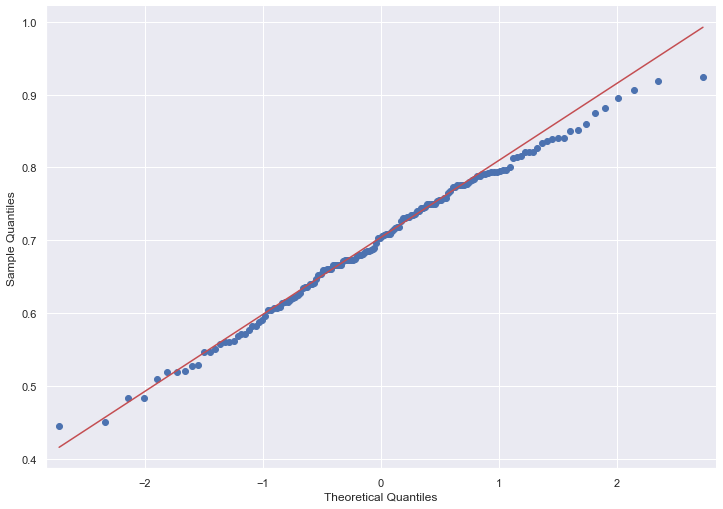

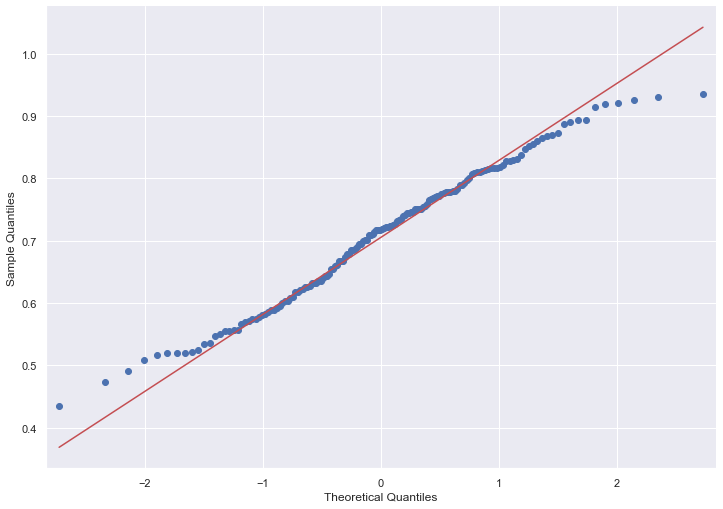

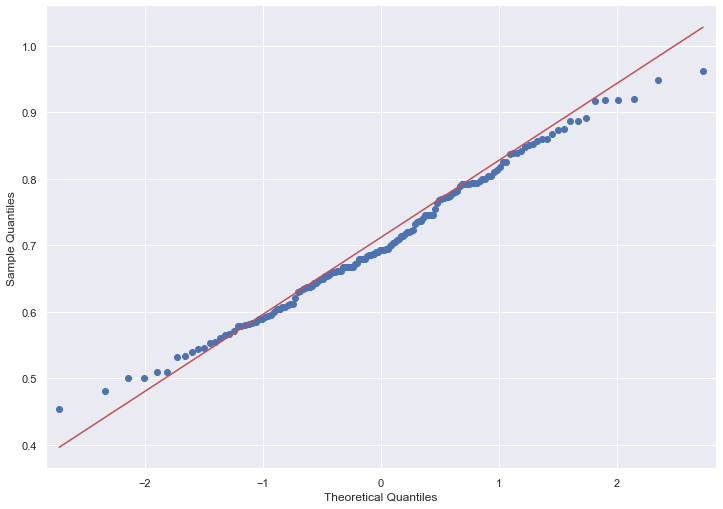

In [98]:
#Test normality 

fig_1 = sm.qqplot(pre_df["Response"], line='q', a = 1/2)
fig_2 = sm.qqplot(post_1df["Response"], line='q', a = 1/2)
fig_3 = sm.qqplot(post_2df["Response"], line='q', a = 1/2)

print(shapiro(pre_df["Response"]))
print(shapiro(post_1df["Response"]))
print(shapiro(post_2df["Response"]))

#Set the axes for the plotting

ax_1 = fig_1.get_axes()[0]
ax_2 = fig_2.get_axes()[0]
ax_3 = fig_3.get_axes()[0]

# Remove the right and top axes for the plotting

ax_1.spines['right'].set_visible(False)
ax_1.spines['top'].set_visible(False)

ax_2.spines['right'].set_visible(False)
ax_2.spines['top'].set_visible(False)

ax_3.spines['right'].set_visible(False)
ax_3.spines['top'].set_visible(False)


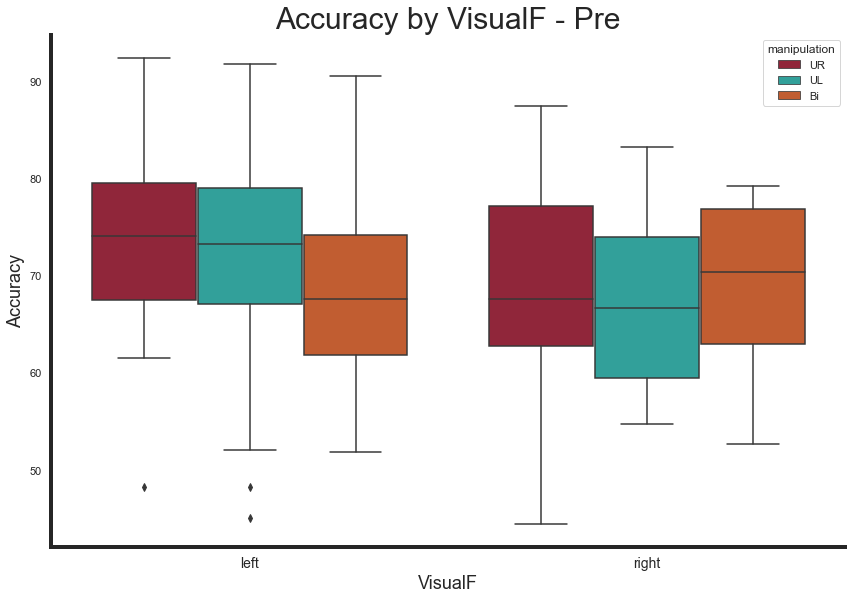

In [99]:
#Make a boxplot of the baseline condition

desired_order = ["UR","UL","Bi"]

custom_palette = ["#A2142F", "#20B2AA", "#D95319"]
sns.set_style(style='white')
pre_df["Response_scaled"] = pre_df["Response"]*100

fig_4 = sns.boxplot(data=pre_df, x="VisualF", y="Response_scaled", hue="manipulation",
                    palette=custom_palette, hue_order=desired_order)


sns.set(rc = {'figure.figsize':(12.0,8.5)})

fig_4.spines['left'].set_linewidth(4)
fig_4.spines['bottom'].set_linewidth(4)
fig_4.spines['right'].set_visible(False)
fig_4.spines['top'].set_visible(False)

fig_4.set_xticklabels(fig_4.get_xticks(), size = 14)
fig_4.set_title('Accuracy by VisualF - Pre', fontdict={'size': 30})
fig_4.set_xlabel("VisualF",fontsize=18)
fig_4.set_ylabel("Accuracy",fontsize=18)

# Set the tick labels for the x-axis
fig_4.set_xticklabels(["left", "right"])

#fig_4.set_yticklabels(fig_4.get_yticks(), size = 14)


# Optionally, you can also set a label for the x-axis
fig_4.set_xlabel("VisualF")
plt.tight_layout()


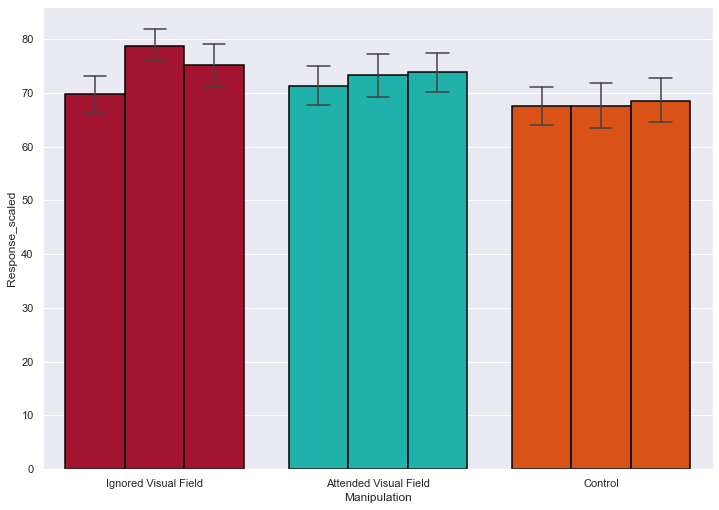

In [100]:
#Make a plot of the % performance on the task for each Manipulation (Ignored, Attended, Control) and for each session (Pre, post_1,post_2)
#in the Sham condition

#Set order of appearence
desired_order = ["Ignored Visual Field","Attended Visual Field","Control"]

#Set customize palette
custom_palette = ["#A2142F", "#20B2AA", "#D95319"]

#Make a copy of the df - Sham
my_file_sham = my_file[my_file["Stimulation"]=="Sham"].copy()

#Scaled the Response, multpiply * 100
my_file_sham["Response_scaled"] = (my_file_sham["Response"]) * 100



#Make the plot
fig_5 = sns.barplot(data=my_file_sham, x="Manipulation", y="Response_scaled", hue="Session",order= desired_order, palette=custom_palette, linewidth= 1.5,
    errwidth=1.5,
    capsize = 0.1,
    alpha=1, ec='black')


#Customize each single bar color fill and edge with a loop

pal = ["#A2142F", "#20B2AA", "#D95319"]
color = pal * df.shape[1]

for p,c in zip(fig_5.patches,color):
    p.set_color(c)
    p.set_edgecolor("black")

fig_5.get_legend().set_visible(False)



# Add labels under each x tick
#for p in ax.patches:
#   ax.annotate("PRE", (p.get_x() + p.get_width() / 2., 0), ha='center', va='center', fontsize=10, color='black', xytext=(0,80),
                    #textcoords='offset points')
#   print(p)

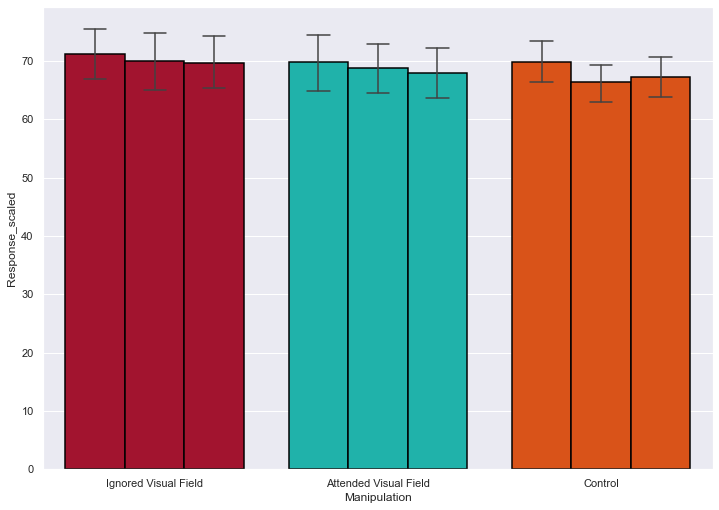

In [101]:
#Make a plot of the % performance on the task for each Manipulation (Ignored, Attended, Control) and for each session (Pre, post_1,post_2)
#in the Active condition

#Make a copy of the df
my_file_active = my_file[my_file["Stimulation"]=="Active"].copy()

#Scaled the response * 100
my_file_active["Response_scaled"] = (my_file_active["Response"]) * 100

#Make the plot
fig_6 = sns.barplot(data=my_file_active, x="Manipulation", y="Response_scaled", hue="Session",order= desired_order, palette=custom_palette, linewidth= 1.5,
    errwidth=1.5,
    capsize = 0.1,
    alpha=1)


#Customize each single bar color fill and edge with a loop

for p,c in zip(fig_6.patches,color):
    p.set_color(c)
    p.set_edgecolor("black")

fig_6.get_legend().set_visible(False)


plt.show(fig_6)

C:\Users\tosim\AppData\Local\Temp\ipykernel_22380\2951688613.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  fig_7 = sns.barplot(data=delta_final_sham, x="Manipulation", y="delta_accuracy_scaled",
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\tosim\AppData\Local\Temp\ipykernel_22380\2951688613.py:44: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  fig_8 = sns.stripplot(data=delta_final_sham, x="Manipulation", y="delta_accuracy_scaled",


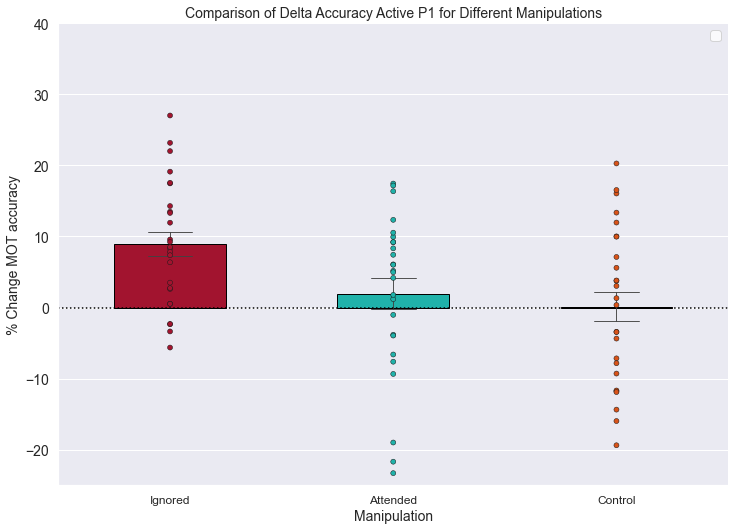

In [102]:
# Filtering the data to get only the rows with "Sham" stimulation and "P1" session
delta_final_sham = (delta_final[(delta_final["Stimulation"] == "Sham") & (delta_final["Session"] == "P1")]).copy()

# Adding a new column scaled by 100 to represent delta accuracy in percentage points
delta_final_sham["delta_accuracy_scaled"] = delta_final_sham["delta_accuracy"] * 100

# Defining a color palette for the bars
pal = ["#A2142F", "#20B2AA", "#D95319"]

# Creating a bar plot 
fig_7 = sns.barplot(data=delta_final_sham, x="Manipulation", y="delta_accuracy_scaled",
                    order=desired_order, width=0.50, linewidth=1, capsize=0.2,
                    ci=68, alpha=1, errwidth=0.9)

# Setting y-axis limits
plt.ylim(-25, 40)

# Removing top and right spines
fig_7.spines['top'].set_visible(False)
fig_7.spines['right'].set_visible(False)

# Adding a dotted horizontal line at y = 0
plt.axhline(y=0, color='black', linestyle='dotted')

# Adding labels and title
plt.xlabel("Manipulation", fontsize=14)
plt.ylabel("% Change MOT accuracy", fontsize=14)
plt.title("Comparison of Delta Accuracy Active P1 for Different Manipulations", fontsize=14)

# Setting x-axis tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
fig_7.set_xticklabels(['Ignored', 'Attended', 'Control'])

# Coloring the bars and setting edge color
for p, c in zip(fig_7.patches, pal):
    p.set_color(c)
    p.set_edgecolor("black")

# Adding a legend to the plot
fig_7.legend(fontsize=14, markerscale=2, facecolor='w')

# Creating a strip plot to overlay individual data points
fig_8 = sns.stripplot(data=delta_final_sham, x="Manipulation", y="delta_accuracy_scaled",
                      order=desired_order, jitter=False, palette=pal,
                      edgecolor='k', linewidth=0.5)

# Display the plots
plt.show(fig_8)


C:\Users\tosim\AppData\Local\Temp\ipykernel_22380\3696484626.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  fig_7 = sns.barplot(data=delta_final_active, x="Manipulation", y="delta_accuracy_scaled",hue='Session',order= desired_order, width=0.50,
C:\Users\tosim\AppData\Local\Temp\ipykernel_22380\3696484626.py:27: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  fig_8=sns.stripplot(data=delta_final_active, x="Manipulation", y="delta_accuracy_scaled", order = desired_order, jitter=False, palette = pal,


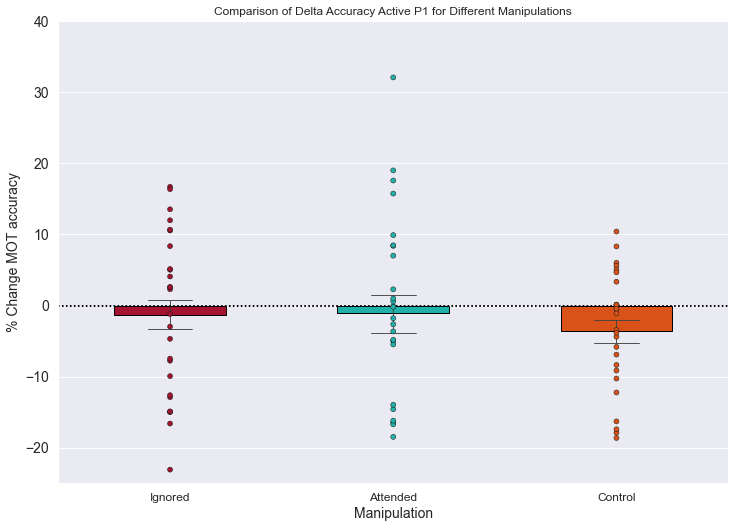

In [103]:
# Filtering the data to get only the rows with "Active" stimulation and "P1" session and make the plot as above


delta_final_active= (delta_final[(delta_final["Stimulation"] == "Active" ) & (delta_final["Session"] =="P1")]).copy()
delta_final_active["delta_accuracy_scaled"] =delta_final_active["delta_accuracy"]*100
pal = ["#A2142F", "#20B2AA", "#D95319"]

fig_7 = sns.barplot(data=delta_final_active, x="Manipulation", y="delta_accuracy_scaled",hue='Session',order= desired_order, width=0.50,
                    linewidth= 1, capsize=0.2, ci=68, alpha=1,errwidth=0.9)
plt.ylim(-25, 40)
fig_7.spines['top'].set_visible(False)
fig_7.spines['right'].set_visible(False)
plt.axhline(y = 0, color = 'black', linestyle = 'dotted')
plt.xlabel("Manipulation", fontsize=14)
plt.ylabel("% Change MOT accuracy",fontsize=14)
plt.title("Comparison of Delta Accuracy Active P1 for Different Manipulations",fontsize=12)
plt.axhline(y = 0, color = 'black', linestyle = 'dotted',)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
fig_7.set_xticklabels(['Ignored','Attended','Control'])

for p,c in zip(fig_7.patches,pal):
    p.set_color(c)
    p.set_edgecolor("black")


fig_8=sns.stripplot(data=delta_final_active, x="Manipulation", y="delta_accuracy_scaled", order = desired_order, jitter=False, palette = pal,
                    edgecolor='k', linewidth=0.5)
fig_7.get_legend().set_visible(False)

plt.show(fig_8)

In [104]:
#Filter the main df and created a scaled column - delta_accuracy_scaled
delta_final_sham= (delta_final[(delta_final["Stimulation"] == "Sham" ) & (delta_final["Session"] =="P1")]).copy()
delta_final_sham["delta_accuracy_scaled"] =delta_final_sham["delta_accuracy"]*100

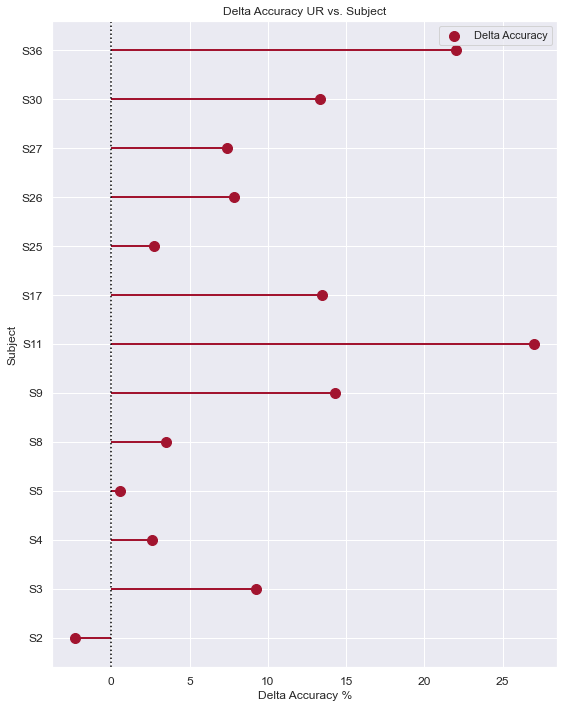

In [105]:
#Make a dot plot - it shows the change in performance in a specific manipulation per each subjects

condition_filtering = (delta_final_sham["Manipulation"] =="Ignored Visual Field") & (delta_final_sham["manipulation"] =="UR")

my_subj_ignored_sham = delta_final_sham[condition_filtering]

# Adjust the figure size as needed
plt.figure(figsize=(8, 10))  

#Make the hlines plot and the scatterplot

plt.hlines(y=my_subj_ignored_sham["Subject"], xmin=0, xmax=my_subj_ignored_sham['delta_accuracy_scaled'], color='#A2142F', linewidth=2)
plt.scatter(my_subj_ignored_sham['delta_accuracy_scaled'], my_subj_ignored_sham["Subject"], color='#A2142F', s=100, label='Delta Accuracy')

#Customize
plt.xlabel('Delta Accuracy %')
plt.ylabel('Subject')
plt.title('Delta Accuracy UR vs. Subject')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(x = 0, color = 'black', linestyle = 'dotted',)
plt.legend()
plt.tight_layout()

plt.show()

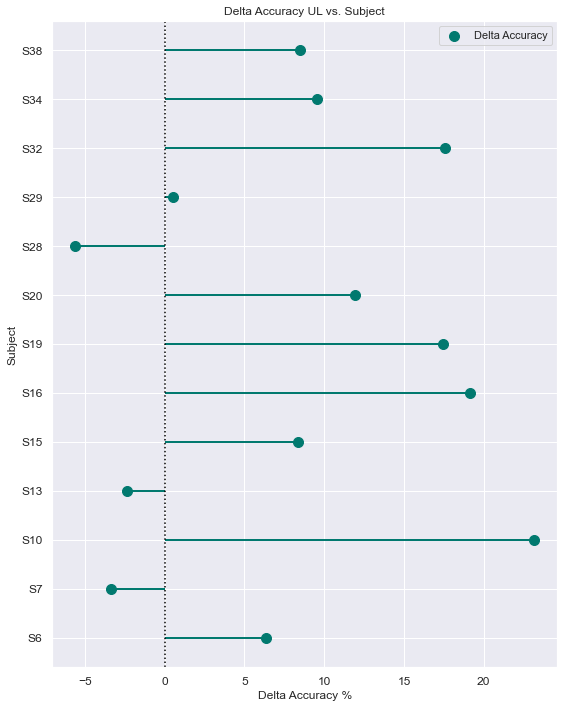

In [106]:
#Make a dot plot - it shows the change in performance in a specific manipulation per each subjects

condition_filtering = (delta_final_sham["Manipulation"] =="Ignored Visual Field") & (delta_final_sham["manipulation"] =="UL")


my_subj_ignored_sham = delta_final_sham[condition_filtering]

plt.figure(figsize=(8, 10))  # Adjust the figure size as needed
plt.hlines(y=my_subj_ignored_sham["Subject"], xmin=0, xmax=my_subj_ignored_sham['delta_accuracy_scaled'], color='#01796F', linewidth=2)
plt.scatter(my_subj_ignored_sham['delta_accuracy_scaled'], my_subj_ignored_sham["Subject"], color='#01796F', s=100, label='Delta Accuracy')
plt.xlabel('Delta Accuracy %')
plt.ylabel('Subject')
plt.title('Delta Accuracy UL vs. Subject')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(x = 0, color = 'black', linestyle = 'dotted',)
plt.legend()
plt.tight_layout()

In [107]:
delta_final_sham

,Subject,manipulation,Manipulation,Stimulation,VisualF,delta_accuracy,Session,delta_accuracy_scaled
2,S6,UL,Attended Visual Field,Sham,Left,0.051724,P1,5.172414
3,S6,UL,Ignored Visual Field,Sham,Right,0.063725,P1,6.372549
6,S7,UL,Attended Visual Field,Sham,Left,0.123433,P1,12.343298
7,S7,UL,Ignored Visual Field,Sham,Right,-0.033565,P1,-3.356481
8,S10,UL,Attended Visual Field,Sham,Left,0.092062,P1,9.206246
...,...,...,...,...,...,...,...,...
146,S37,Bi,Control,Sham,Left,-0.034014,P1,-3.401361
150,S35,Bi,Control,Sham,Right,-0.193692,P1,-19.369202
151,S35,Bi,Control,Sham,Left,0.038146,P1,3.814628
153,S39,Bi,Control,Sham,Right,0.056022,P1,5.602241


In [108]:
#Fit a demo lmer model wit the statsmodels package 

md = smf.mixedlm("delta_accuracy ~ Manipulation * VisualF", delta_final_sham, groups="Subject")
mdf = md.fit()
print(mdf.summary())

                             Mixed Linear Model Regression Results
Model:                        MixedLM             Dependent Variable:             delta_accuracy
No. Observations:             78                  Method:                         REML          
No. Groups:                   39                  Scale:                          0.0095        
Min. group size:              2                   Log-Likelihood:                 52.9557       
Max. group size:              2                   Converged:                      Yes           
Mean group size:              2.0                                                               
------------------------------------------------------------------------------------------------
                                                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------------
Intercept                                              0.039

C:\Users\tosim\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


C:\Users\tosim\AppData\Local\Temp\ipykernel_22380\1629927641.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(mdf.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)
C:\Users\tosim\anaconda3\envs\course-env\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Text(0.5, 0, 'Residuals')

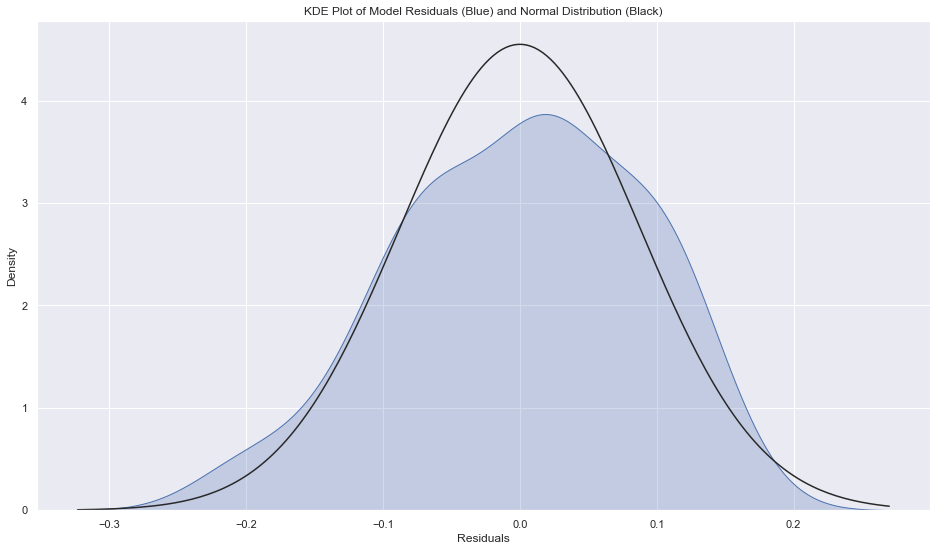

In [109]:
#Visualize the residuals with a kernal density estimate plot and Q-Q plot.
fig = plt.figure(figsize = (16, 9))

ax = sns.distplot(mdf.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)



ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")


Text(0.5, 1.0, 'Q-Q Plot')

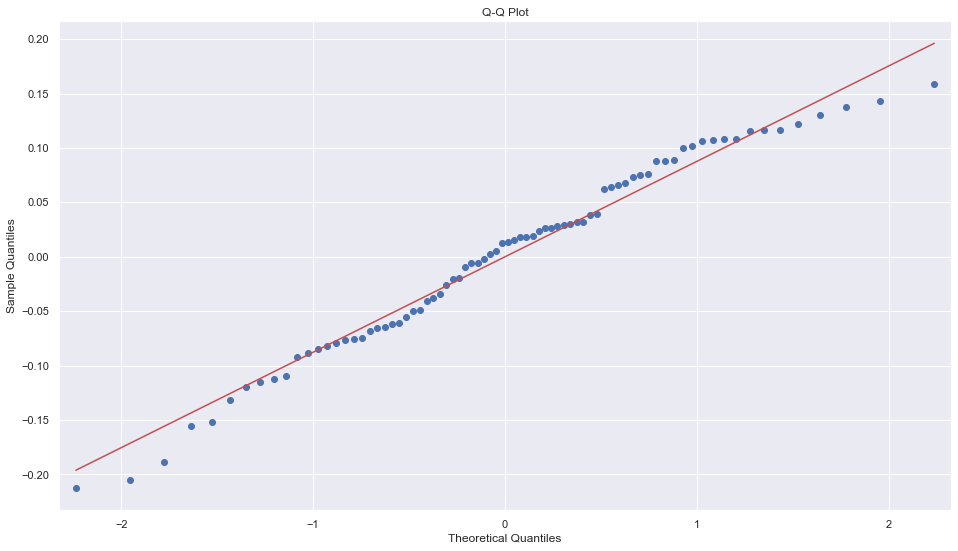

In [110]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

sm.qqplot(mdf.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot")

In [111]:
# Checking assumption of normality for the residuals 

labels = ["Statistic", "p-value"]

norm_res = stats.shapiro(mdf.resid)

for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)

Statistic 0.9751671552658081
p-value 0.13105714321136475


Text(0, 0.5, 'Residuals')

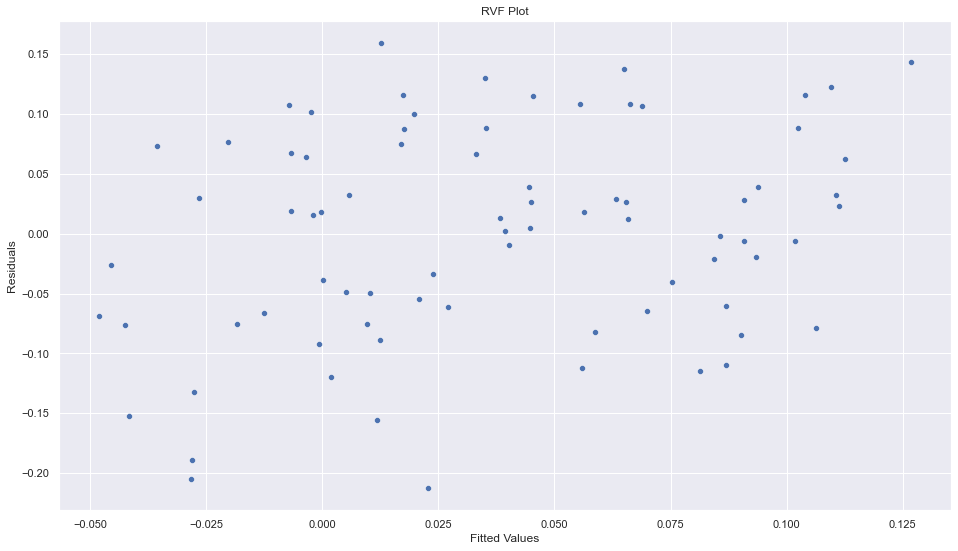

In [112]:
#check for homoskedasticity of variance  - Visually

fig = plt.figure(figsize = (16, 9))

ax = sns.scatterplot(y = mdf.resid, x = mdf.fittedvalues)

ax.set_title("RVF Plot")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")

In [113]:
#check for homoskedasticity of variance  - Statistically

from statsmodels.stats.diagnostic import het_white

het_white_res = het_white(mdf.resid, mdf.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

LM Statistic 3.101682942388897
LM-Test p-value 0.684312753051455
F-Statistic 0.596331614982013
F-Test p-value 0.7027995414670498
